In [53]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable


In [54]:
import torch

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

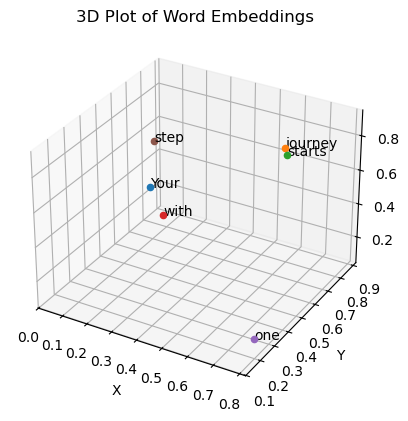

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

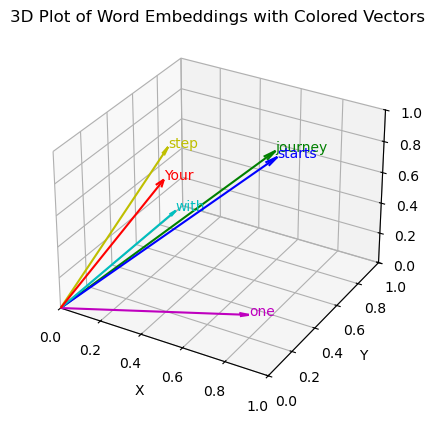

In [56]:
# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()


In [57]:
query = inputs[1] # We are giving the input of second word "journey"
attn_scores_2 = torch.empty(inputs.shape[0]) # We are making an empty tensor of size 6
for i, x_i in enumerate(inputs): # we are iterating through each word vector
    attn_scores_2[i] = torch.dot(x_i, query) # Taking dot product of each word vector with the query vector
print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [58]:
# Now we need to normalize the attention scores from real numbers to probabilities to clear mention of whci word is more important
att_weight = attn_scores_2 / attn_scores_2.sum()
print(att_weight)
print(att_weight.sum()) # Sum of all the probabilities should be 1

tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
tensor(1.0000)


In [59]:
# Softmax is best to use for normalisation
def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=0)
attn_scores_softmax = softmax(attn_scores_2)
print(attn_scores_softmax)
#sum
print(attn_scores_softmax.sum()) # Sum of all the probabilities should be 1

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
tensor(1.)


In [60]:
attn_weights = torch.softmax(attn_scores_2, dim=0)
print(attn_weights)
print(attn_weights.sum()) # Sum of all the probabilities should be 1

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
tensor(1.)


In [61]:
# Now we will find the context vector
query = inputs[1]
context_vect = torch.zeros(query.shape) # we are making an emoty tensor of size 6
for i,x_i in enumerate(inputs): # we are looping through the inputs and the attention weights
    context_vect += attn_weights[i]*x_i # We are multipying the normalized attention score weights with the associated inputs
print(context_vect)

tensor([0.4419, 0.6515, 0.5683])


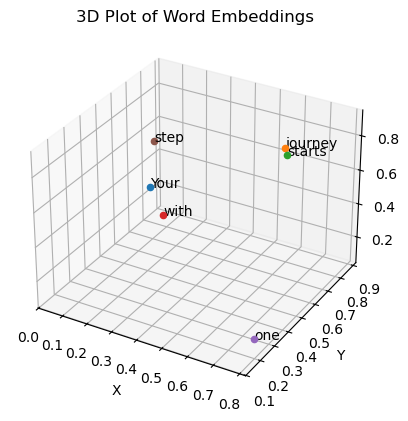

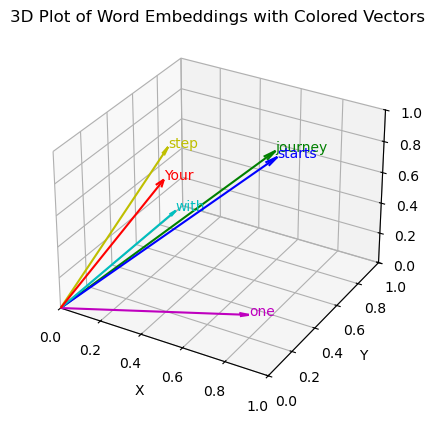

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55], # step     (x^6)
   ]
)

# Corresponding words
words = ['Your', 'journey', 'starts', 'with', 'one', 'step', 'journey-context']

# Extract x, y, z coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of Word Embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()

In [63]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [64]:
att1 = torch.softmax(attn_scores, dim = -1)
print(att1)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [65]:
row_2_sum = sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
print("Row 2 sum:", row_2_sum)
print("All row sums:", att1.sum(dim=-1))

Row 2 sum: 1.0
All row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


In [66]:
all_context_vectors = att1 @ inputs
print(all_context_vectors)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


In [67]:
# Now we will initialize the weights for query, key and value
import torch.nn as nn
query = inputs[1]
d_in = inputs.shape[1] # because it needed to be same as the input dimension
print(d_in)
d_out = 2 # we are choosing the matrix dimension to be 3 * 2



3


In [68]:
torch.manual_seed(123) # Gives the same random number for reproduction
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False) # We are creating a matrix of size 3 * 2
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [69]:
query_2 = query @ W_query # We are multiplying the query vector "Journey" with the weight matrix
print(query_2)
key_2 = query @ W_key
value_2 = query @ W_value

tensor([0.4306, 1.4551])


In [70]:
print(key_2)

tensor([0.4433, 1.1419])


In [71]:
print(value_2)

tensor([0.3951, 1.0037])


In [72]:
keys = inputs @ W_key # We are multpilying all the input vectors with the key weight matrix
values = inputs @ W_value
queries = inputs @ W_query

print(keys.shape)
print(values.shape)
print(keys)
print(queries)

torch.Size([6, 2])
torch.Size([6, 2])
tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]])
tensor([[0.2309, 1.0966],
        [0.4306, 1.4551],
        [0.4300, 1.4343],
        [0.2355, 0.7990],
        [0.2983, 0.6565],
        [0.2568, 1.0533]])


In [73]:
keys_2 = keys[1] #A
attn_score_22 = query_2.dot(keys_2)
print(attn_score_22)

tensor(1.8524)


In [74]:
att_score_02 = queries[1] @ keys.T
print(att_score_02) # We are making a realtion with the second word "journey" with all the other words and try to find the attention score

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [75]:
att_score_03 = queries @ keys.T
print(att_score_03) # We are making a realtion with  all the other words and try to find the attention score

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


In [76]:
d_k = keys.shape[-1]
att_soft = torch.softmax(att_score_03 / d_k**0.5, dim=-1) # We are scaling down the attention scores needed for the softmax
# But the interesting thing is that the scaling factor is square root of the dimension of the key vector
# 1. We cant have large values for the dot product of query and key vectors because it will make the softmax function to have very small gradients which will make the learning very slow
# 2. While increasing in the dimension the variance also increases which will make the softmax function to have very small gradients which will make the learning very slow
print(att_soft)
print(d_k)

tensor([[0.1551, 0.2104, 0.2059, 0.1413, 0.1074, 0.1799],
        [0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
        [0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819],
        [0.1591, 0.1994, 0.1962, 0.1477, 0.1206, 0.1769],
        [0.1610, 0.1949, 0.1923, 0.1501, 0.1265, 0.1752],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])
2


In [77]:
context_vector_02 = att_soft @ values # Finding all the context vectors 
print(context_vector_02)

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])


In [78]:
# Now we are implenting the self attention python class
import torch.nn as nn
class SelfAttentionv1_(nn.Module):
    def __init__(self, d_in, d_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(d_in. d_out))
        self.W_key = nn.Parameter(torch.rand(d_in,d_out))
        self.W_value = nn.Parameter(torch.rand(d_in,d_out))
    
    def forward(self,x):
        keys = x @ self.W_key
        values = x @ self.W_value
        queries = x @ self.W_query
        d_k = keys.shape[-1]
        attn = queries @ keys.T
        attn_42 = torch.softmax(attn / d_k**0.5, dim=-1)
        context_42  = attn_42 @ values
        return context_42

In [79]:
class SelfAttention_v2(nn.Module):

    def __init__(self, d_in, d_out, qkv_bias=False):
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

    def forward(self, x):
        keys = self.W_key(x)
        queries = self.W_query(x)
        values = self.W_value(x)
        
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

        context_vec = attn_weights @ values
        return context_vec

In [80]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)


In [81]:
# Now we are going to create casual attention
# We will hide the future words in the sequence

In [82]:

inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)

In [83]:
queries = sa_v2.W_query(inputs) #A
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [84]:
context_length = inputs.shape[0]
print(context_length)

6


In [85]:
torch.ones(context_length,context_length)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])

In [86]:
context_length = inputs.shape[0]
mask_simple = torch.tril(torch.ones(context_length,context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [87]:
masked_simple = mask_simple * attn_weights
print(masked_simple)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [88]:
# As we can see the upper triangular matrix is zero which means that the future words are hidden
# But the Problem is the sum of ros is not equal to 1
# So we need to normalize again , Insted of doing it again there is an efficient way
row_sums = masked_simple.sum(dim=1, keepdim=True)
masked_simple_norm = masked_simple / row_sums
print(masked_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


In [89]:
# Now 1. We ill Make the upper traingular infim=nity matrix an then apply the softmax function
torch.triu(torch.ones(context_length, context_length))

tensor([[1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.]])

In [90]:
print(attn_scores)

tensor([[ 0.2899,  0.0716,  0.0760, -0.0138,  0.1344, -0.0511],
        [ 0.4656,  0.1723,  0.1751,  0.0259,  0.1771,  0.0085],
        [ 0.4594,  0.1703,  0.1731,  0.0259,  0.1745,  0.0090],
        [ 0.2642,  0.1024,  0.1036,  0.0186,  0.0973,  0.0122],
        [ 0.2183,  0.0874,  0.0882,  0.0177,  0.0786,  0.0144],
        [ 0.3408,  0.1270,  0.1290,  0.0198,  0.1290,  0.0078]],
       grad_fn=<MmBackward0>)


In [91]:
mask =torch.triu(torch.ones(context_length, context_length),diagonal=1)
print(mask)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])


In [92]:

mask =torch.triu(torch.ones(context_length, context_length),diagonal=1)
masked_42 = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked_42)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [93]:
attn_weights00= torch.softmax(masked_42 / keys.shape[-1]**0.5, dim=1)
print(attn_weights00)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


In [94]:
# Now we will try to add dropout to the attention weights
example = torch.ones(6, 6) #B
print(example)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])


In [95]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5) #A
example = torch.ones(6, 6) # B
print(dropout(example))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


In [96]:
torch.manual_seed(123)
print(dropout(attn_weights00))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7599, 0.6194, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4921, 0.4925, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3966, 0.0000, 0.3775, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.3331, 0.3084, 0.3331, 0.0000]],
       grad_fn=<MulBackward0>)


In [97]:
batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape) 

torch.Size([2, 6, 3])


In [98]:
# Now we will implement the casual attention in the self attention class
class CausalAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout,qkv_bias=False): # We are creating an instance variable context_length
        super().__init__()
        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)    # query key value weight matrices   
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.context_length = context_length
        self.dropout = nn.Dropout(dropout) 
        self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1)) # New

    def forward(self, x):
        b, num_tokens, d_in = x.shape # We are creating [batch_size, num_tokens, d_in]
        # b = batch size, num_tokens = number of tokens in the sequence, d_in   
        keys = self.W_key(x) # Multiplying the input with the weight matrices   
        queries = self.W_query(x)
        values = self.W_value(x)
        attn_scores = queries @ keys.transpose(1,2) # Making the dot product of query and key vectors
        attn_scores.masked_fill_(self.mask.bool()[:num_tokens, :num_tokens], -torch.inf) 
        # We are checking in the mask and if we find any postive values we convert them into - infiniteity
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1) # We are scaling down as we done prreviously
        # We are adding a dropout layer because it helps in regularization and prevents overfitting by randomly setting a fraction of input units to zero during training
        # For example in nueral networks if we are not using some hidden layers it turns off to zero
        # In attention mechanism it turns off some attention weights to zero
        # This helps the model to not rely too much on any particular part of the input and encourages it to learn more robust features
        # This is especially useful in large models with many parameters where overfitting is a common
        attn_weights = self.dropout(attn_weights) # Dropout layer is used when we havee big values of attention weights
        context_vec = attn_weights @ values # Creating the context vectors
        return context_vec

In [99]:
torch.manual_seed(123)
context_length = batch.shape[1] # Explain this 
print(context_length)
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs.shape)

6
context_vecs.shape: torch.Size([2, 6, 2])


In [100]:
print(context_vecs) # Printing some of the context vectors  

tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]]], grad_fn=<UnsafeViewBackward0>)


In [101]:
# Now we are going to implement multi-head attention Part 1
class multiheadattentionwrapper(nn.Module):
    def __init__(self,d_in,d_out,num_heads,context_length,dropout,qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList([CausalAttention(d_in, d_out, context_length, dropout, qkv_bias) for _ in range(num_heads)])
        self.linear = nn.Linear(num_heads * d_out, d_in) # Final linear layer
    
    def foward(self,x):
        return torch.cat([head(x) for head in self.heads], dim=-1)
    
        


In [102]:
#Implementing multi head attention with weight splits
# We need to create multiple sets of weight matrices for query, key and value for each head   
# Now we will implement the multi head attenttion weight matrices and also we will find the relation between the other words


In [ ]:
# #In above we have create two classes for casual and multi head attention
# class multiheadattention(nn.Module):
#     def __inti__(self,d_in,d_out,context_length,dropout,num_heads,qkv_bias=False):
#         super().__init__()
#         assert d_out % num_heads == 0, "d_out must be divisible by num_heads"
#         self.num_heads = num_heads
#         self.d_out = d_out
#         self.head_dim = d_out // num_heads
#         self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
#         self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
#         self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
#         self.dropout = nn.Dropout(dropout)
#         self.out_proj = nn.Linear(d_out, d_in)
#         self.register_buffer('mask', torch.triu(torch.ones(context_length, context_length), diagonal=1)) # Register_buffer will complete become invisible and not optimized
    
#     def forward(self,x):
#         b, num_tokens, dd_in = x.shape # 6
#         keys = self.W_key(x) # Multiplying the input with the weight matrices
#         queries = self.W_query(x)  
#         values = self.W_value(x)


#         keys = keys.view(b,num_tokens,self.num_heads,self.head_dim) # We divided the d_out = 6 into 2 heads so each head will have 3 dimensions
#         queries = queries.view(b,num_tokens,self.num_heads,self.head_dim)
#         values = values.view(b,num_tokens,self.num_heads,self.head_dim)

#         keys = keys.transpose(1,2) # Initally we had the shape of (b,num_tokens,num_heads,head_dim) we are changing it to (b,num_heads,num_tokens,head_dim)
#         queries = queries.transpose(1,2) # Because we want look the matrix according to the heads not through the tokens
#         values = values.transpose(1,2)

#         attn_scores = queries @ keys.transpose(2,3)  # We are making the dot product of query and key vectors
#         # Shape: (b, num_heads, num_tokens, num_tokens)
#         mask_bool = self.mask.bool()[:num_tokens, :num_tokens] # We need this because if the input sequence is smaller than the context length
#         mask_bool = mask_bool.unsqueeze(0).unsqueeze(0) # Shape: (1, 1, num_tokens, num_tokens)
#         # We are unsqueezing it because we want to make it compatible with the attention scores shape
#         # Shape: (b, num

#         # Use the mask to fill attention scores
#         attn_scores.masked_fill_(mask_bool, -torch.inf) # Making the triu - infiniteity
        
#         attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1) # We are scaling down as we done prreviously
#         attn_weights = self.dropout(attn_weights) # keys.shape[-1] is the head_dim and head_dim = d_out // num_heads

#         # Shape: (b, num_tokens, num_heads, head_dim)
#         context_vec = (attn_weights @ values).transpose(1, 2)  # and then we are transposing it to the shape of (b, num_tokens, num_heads, head_dim)
        
#         # Combine heads, where self.d_out = self.num_heads * self.head_dim
#         context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
#         context_vec = self.out_proj(context_vec) # optional projection

#         return context_vec




In [109]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim) 
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)
        
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2) 
        
        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

In [110]:
torch.manual_seed(123)

# Define the tensor with 3 rows and 6 columns
inputs = torch.tensor(
    [[0.43, 0.15, 0.89, 0.55, 0.87, 0.66],  # Row 1
     [0.57, 0.85, 0.64, 0.22, 0.58, 0.33],  # Row 2
     [0.77, 0.25, 0.10, 0.05, 0.80, 0.55]]  # Row 3
)

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape) 

batch_size, context_length, d_in = batch.shape
d_out = 6
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

torch.Size([2, 3, 6])
tensor([[[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]],

        [[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]]],
       grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 3, 6])
